In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from osgeo import gdal, osr

**DOING ON RASTER IMAGE**

In [ ]:
#doing on pune data

pune22= gdal.Open('/content/drive/MyDrive/image_2022.tif',0)
blue=pune22.GetRasterBand(1)
green=pune22.GetRasterBand(2)
red=pune22.GetRasterBand(3)
nir=pune22.GetRasterBand(4)
swir1=pune22.GetRasterBand(5)
swir2=pune22.GetRasterBand(6)

blueData=blue.ReadAsArray()
greenData=green.ReadAsArray()
redData=red.ReadAsArray()
nirData=nir.ReadAsArray()
swir1Data=swir1.ReadAsArray()
swir2Data=swir2.ReadAsArray()

In [ ]:
pune22=None

In [ ]:
print(blueData.shape)

(5568, 6828)


In [ ]:
arr=np.column_stack((blueData.ravel(),greenData.ravel(),redData.ravel(),nirData.ravel(),swir1Data.ravel(),swir2Data.ravel()))
print(arr.shape)
print(arr.ndim)

(38018304, 6)
2


In [ ]:
arr[np.isnan(arr)] = -999.99

In [ ]:
print(arr.dtype)

float64


In [ ]:
kmn=KMeans(n_clusters=10)
kmn.fit(arr)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [ ]:
oparr=kmn.labels_.reshape(5568, 6828)

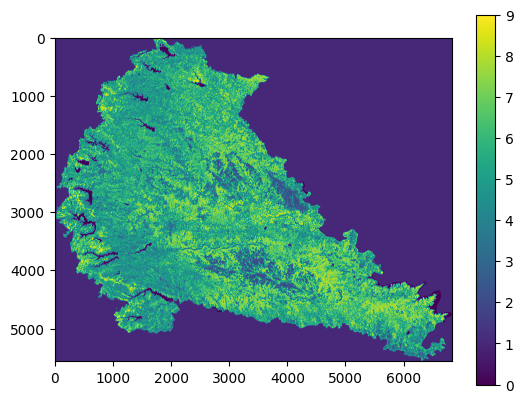

In [ ]:
plt.imshow(oparr)
plt.colorbar()

In [ ]:
output_file = "/content/drive/MyDrive/pune22_clus_10_mod3.tif"
driver = gdal.GetDriverByName("GTiff")

# get the spatial reference system of the data (optional)
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)  # set to WGS84

# create a new GeoTIFF file with one band
dst_ds = driver.Create(output_file, oparr.shape[1], oparr.shape[0], 1, gdal.GDT_Float32)

# set the projection (optional)
dst_ds.SetProjection(srs.ExportToWkt())

# write the data to the GeoTIFF file
dst_ds.GetRasterBand(1).WriteArray(oparr)

# close the file
dst_ds = None


In [ ]:
#predicting on 2002 data with 2022 clustering

pune02= gdal.Open('/content/drive/MyDrive/image_2002.tif',0)
blue1=pune02.GetRasterBand(1)
green1=pune02.GetRasterBand(2)
red1=pune02.GetRasterBand(3)
nir1=pune02.GetRasterBand(4)
swir11=pune02.GetRasterBand(5)
swir21=pune02.GetRasterBand(6)

blueData1=blue1.ReadAsArray()
greenData1=green1.ReadAsArray()
redData1=red1.ReadAsArray()
nirData1=nir1.ReadAsArray()
swir1Data1=swir11.ReadAsArray()
swir2Data1=swir21.ReadAsArray()

In [ ]:
pune02=None

In [ ]:
dataToPredict= np.column_stack((blueData1.ravel(),greenData1.ravel(),redData1.ravel(),nirData1.ravel(),swir1Data1.ravel(),swir2Data1.ravel()))
print(dataToPredict.shape)
print(dataToPredict.ndim)
dataToPredict[np.isnan(dataToPredict)] = -999.99

(38018304, 6)
2


In [ ]:
print(dataToPredict[0])

[-999.99 -999.99 -999.99 -999.99]


In [ ]:
predict_test = np.array(dataToPredict[3039877])
predict_test1 = predict_test.reshape(1,-1)
kmn.predict(predict_test1)

array([2], dtype=int32)

In [ ]:
labelsToPredict = kmn.predict(dataToPredict)
labelsImage= labelsToPredict.reshape(5568, 6828)

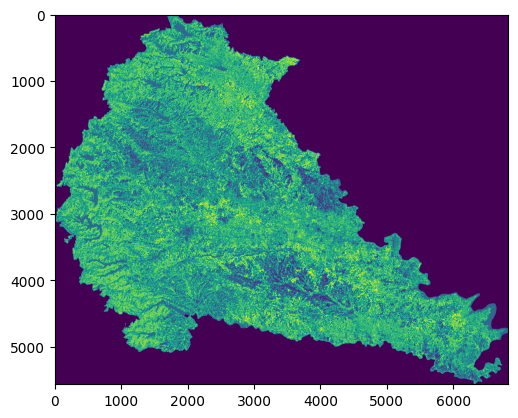

In [ ]:
plt.imshow(labelsImage)

In [ ]:
output_file1 = "/content/drive/MyDrive/pune02_clus_10_mod2_pred.tif"
driver1 = gdal.GetDriverByName("GTiff")

# get the spatial reference system of the data (optional)
srs1 = osr.SpatialReference()
srs1.ImportFromEPSG(4326)  # set to WGS84

# create a new GeoTIFF file with one band
dst_ds1 = driver1.Create(output_file1, labelsImage.shape[1], labelsImage.shape[0], 1, gdal.GDT_Float32)

# set the projection (optional)
dst_ds1.SetProjection(srs.ExportToWkt())

# write the data to the GeoTIFF file
dst_ds1.GetRasterBand(1).WriteArray(labelsImage)

# close the file
dst_ds1 = None